# *In this dataset, I used data from Kaggle (https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who) that pertains to global life expectancy. The dataset explores various factors influencing life expectancy, including alcohol consumption, schooling, a country's developmental status (whether it is considered developed or in development), and many more. I will be conducting data exploration on this dataset.*


# *First, let's import the libraries that we will use for our data exploration.*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# *Now let's read our csv file*

In [2]:
df=pd.read_csv('Life Expectancy Data.csv')

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.shape

(2938, 22)

#*We have 2938 rows and 22 columns/features in this dataset*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# *In the next step, we will prepare our dataset by addressing missing values and duplicates.*

In [6]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
df.isnull().sum()/df.shape[0]*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [8]:
df.duplicated().sum()

0

# *We do not have any duplicates*

# *We have many null value in the dataset so lets fill out these null values with mean value of the data.*

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
for j in ['Life expectancy ','Adult Mortality','Alcohol','Hepatitis B',' BMI ','Polio','Total expenditure','Diphtheria ','GDP','Population',' thinness  1-19 years',' thinness 5-9 years', 'Income composition of resources', 'Schooling']:
  df[j]=imputer.fit_transform(df[[j]])


In [11]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

#*Descriptive statistics with describe() function*

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2938.0,6.922493e+01,9.507640e+00,36.30000,63.200000,7.200000e+01,7.560000e+01,8.900000e+01
Adult Mortality,2938.0,1.647964e+02,1.240803e+02,1.00000,74.000000,1.440000e+02,2.270000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2938.0,4.602861e+00,3.916288e+00,0.01000,1.092500,4.160000e+00,7.390000e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2938.0,8.094046e+01,2.258685e+01,1.00000,80.940461,8.700000e+01,9.600000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2938.0,3.832125e+01,1.992768e+01,1.00000,19.400000,4.300000e+01,5.610000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


# *Now, let's conduct some exploratory data analysis. First of all, let's take a look at the correlations between the numerical values.*

In [13]:
c=df.select_dtypes(include="number").corr()

<Axes: >

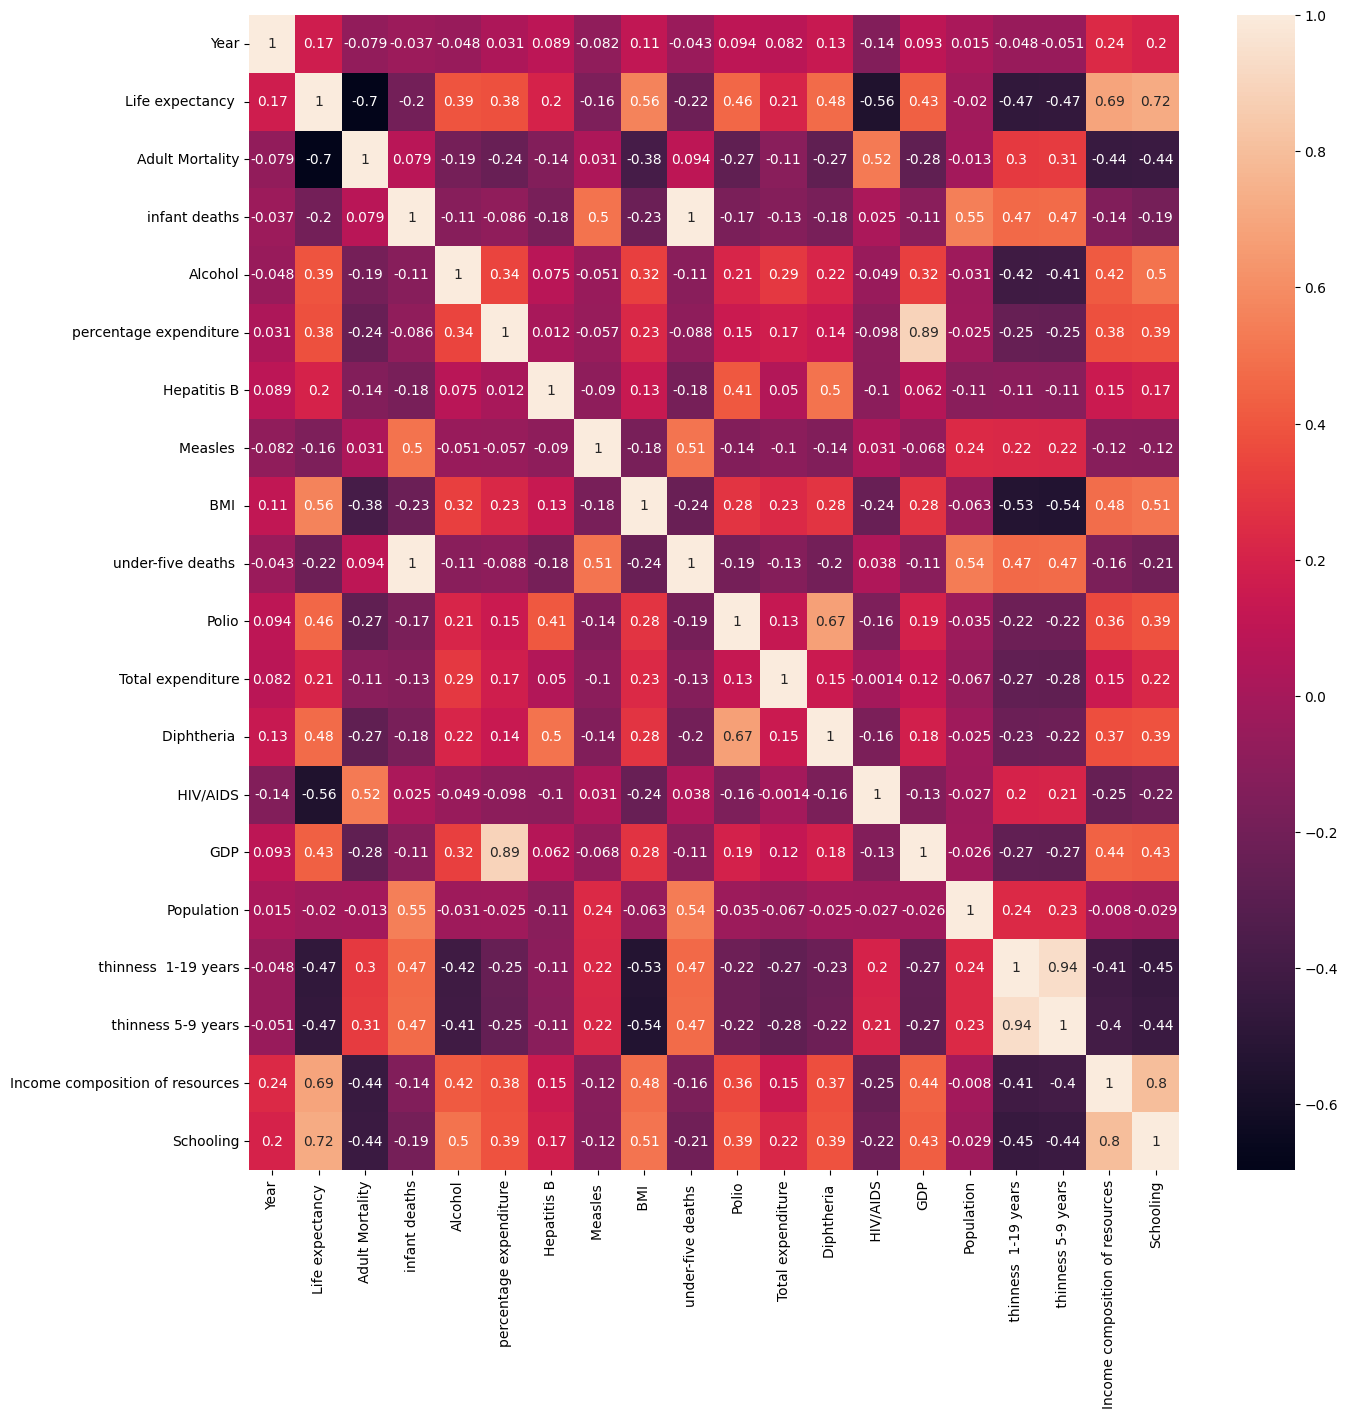

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(c,annot=True)

#*There is a significant correlation between life expectancy and schooling, as well as between life expectancy and the income composition of resources*

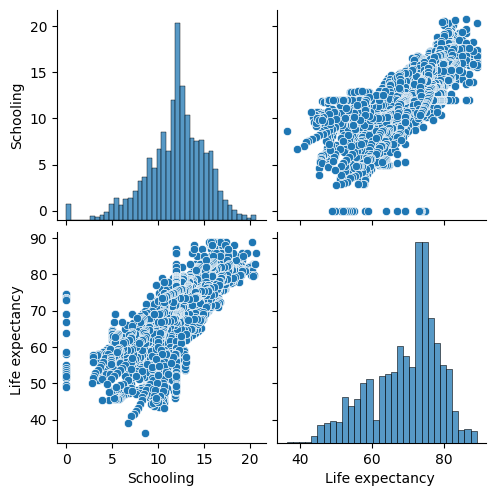

In [15]:
sns.pairplot(df[['Schooling', 'Life expectancy ']])
plt.xlabel('Schooling')
plt.ylabel('Life expectancy ')
plt.show()

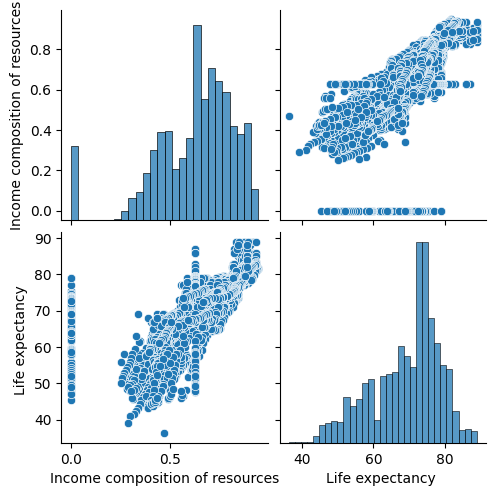

In [16]:
sns.pairplot(df[['Income composition of resources', 'Life expectancy ']])
plt.xlabel('Schooling')
plt.ylabel('Life expectancy ')
plt.show()

#*In the next step, we will use Plotly to create a more interactive plot illustrating the distribution of life expectancy within each age group.*

In [17]:
fig = px.histogram(df, x = 'Life expectancy ', template = 'gridon')
fig.show()

#*There is a peak in counts within the age range of 72.5-75.5*

#*Now, let's compare life expectancy between developed and developing countries.*





In [18]:
fig = px.violin(df, x= 'Status', y= 'Life expectancy ',template='plotly_dark',
                color = 'Status',box = True,title='Life Expectancy on the Basis of Country Status')
fig.show()

#*As we can see, developed countries have a much higher life expectancy rate, with a median of 79.25, compared to developing countries, which have a median of 69.05.*

# *In the next step, we will create line chart that shows the average life expectancy in the world by year. The plot shows that life expectancy has increased steadily over time, from around 67 years in 2000 to over 71 years in 2015. The average annual increase in life expectancy is about 0.27 years.*

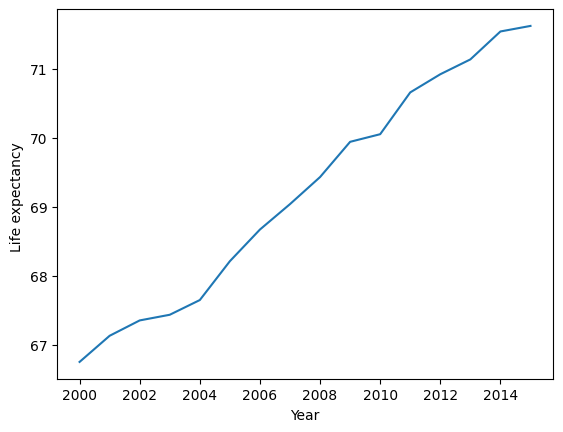

In [23]:
mean_life_expectance = df.groupby("Year")["Life expectancy "].mean()
sns.lineplot(data=mean_life_expectance)
plt.show()

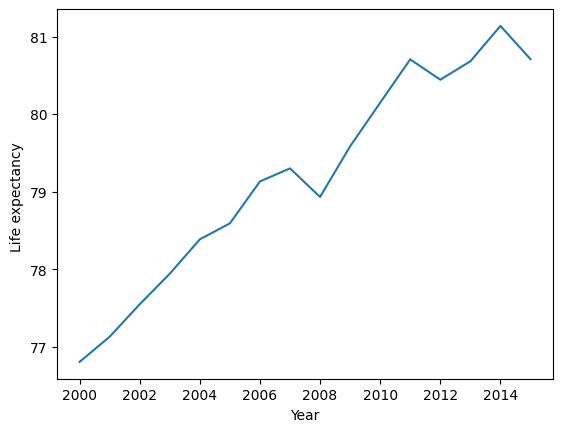

In [24]:
mean_life_expectance = df[df.Status == "Developed"].groupby("Year")["Life expectancy "].mean()
sns.lineplot(data=mean_life_expectance)
plt.show()

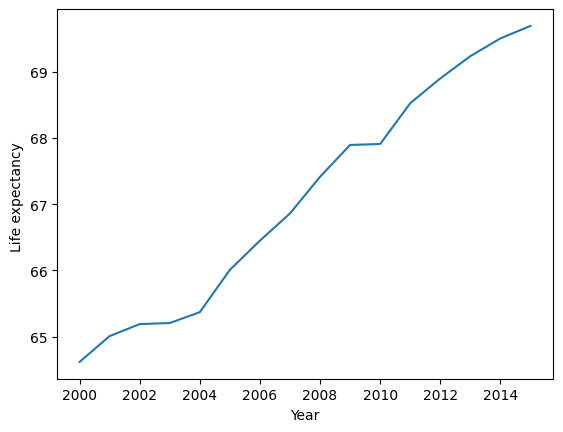

In [25]:
mean_life_expectance = df[df.Status == "Developing"].groupby("Year")["Life expectancy "].mean()
sns.lineplot(data=mean_life_expectance)
plt.show()

#*Developing countries experienced a steadier and more significant increase in life expectancy over those years than developed countries, which faced more instability in their rates of improvement.*

In [19]:
px.scatter(df.sort_values(by = 'Year'),x = 'Life expectancy ', y = 'infant deaths', color = 'Country',
           size = 'Year', template = 'presentation', opacity = 0.6,title = 'Life expectancy VS Infant Death of Countries in Every Year')

#*Above graph shows that more infant death low life expectancy. e.g India had 1800 infant death in year 2000 and the life expectancy rate in year 2000 was 62.5 on other hand in 2015 infant death decreases to 910 and life expectancy increases to 68.3. So life expectancy is directly propotional to the death of the infant per year.*

#*Next, we have an animated representation of life expectancy that progresses through different years, offering a visual journey into how life expectancy evolves for each individual country.*

In [20]:
fig = px.line((df.sort_values(by = 'Year')), x = 'Year', y = 'Life expectancy ',
    animation_frame= 'Country',animation_group='Year',color='Country',
    markers=True,template = 'plotly_dark',title='<b>Country Wise Life Expectancy over the years')
fig.show()

In [21]:
country_data = px.data.gapminder()
country_data.tail()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298,ZWE,716


#*And lastly, we have an animated representation of the world map with references to the life expectancy of every country for the year 2007, which is the mean year of the dataset.*

In [22]:
map_fig = px.scatter_geo(country_data,locations = 'iso_alpha', projection = 'orthographic',
                         opacity = 0.8, color = 'country', hover_name = 'country',
                         hover_data = ['lifeExp', 'year'],template = 'plotly_dark',title = '<b>Life Expectancy over the World Map')
map_fig.show()

#*As we can see there is a significant difference in life expectancy between developed and developing countries. Key factors contributing to this difference include educational attainment (schooling) and the composition of income resources. Developed nations consistently demonstrate higher life expectancies, emphasizing the critical role of education and economic resources in shaping the overall well-being and longevity of populations worldwide.*